In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [53]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [54]:
df.shape

(50000, 14)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***1st Moment Business Decision (Measures of Central Tendency)***

1) Mean

2) Median

3) Mode

In [56]:
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

num_passengers            1.591240
purchase_lead            84.940480
length_of_stay           23.044560
flight_hour               9.066340
wants_extra_baggage       0.668780
wants_preferred_seat      0.296960
wants_in_flight_meals     0.427140
flight_duration           7.277561
booking_complete          0.149560
dtype: float64


num_passengers            1.00
purchase_lead            51.00
length_of_stay           17.00
flight_hour               9.00
wants_extra_baggage       1.00
wants_preferred_seat      0.00
wants_in_flight_meals     0.00
flight_duration           7.57
booking_complete          0.00
dtype: float64


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               1      Internet  RoundTrip              1               6   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            8        Mon  AKLKUL      Australia                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0  

***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [57]:
print(df.var())
print('\n')
print(df.std())

num_passengers              1.040736
purchase_lead            8181.451806
length_of_stay           1148.374182
flight_hour                29.296885
wants_extra_baggage         0.221518
wants_preferred_seat        0.208779
wants_in_flight_meals       0.244696
flight_duration             2.240599
booking_complete            0.127194
dtype: float64


num_passengers            1.020165
purchase_lead            90.451378
length_of_stay           33.887670
flight_hour               5.412660
wants_extra_baggage       0.470657
wants_preferred_seat      0.456923
wants_in_flight_meals     0.494668
flight_duration           1.496863
booking_complete          0.356643
dtype: float64


***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [58]:
df.skew()

num_passengers           2.690908
purchase_lead            1.653035
length_of_stay           5.274743
flight_hour              0.396623
wants_extra_baggage     -0.717239
wants_preferred_seat     0.888762
wants_in_flight_meals    0.294593
flight_duration         -0.360080
booking_complete         1.965292
dtype: float64

***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [59]:
df.kurt()

num_passengers           10.062131
purchase_lead             2.486702
length_of_stay           48.810238
flight_hour              -0.302438
wants_extra_baggage      -1.485627
wants_preferred_seat     -1.210150
wants_in_flight_meals    -1.913291
flight_duration          -1.373927
booking_complete          1.862448
dtype: float64

***Descriptive Statistics and Data Distribution Function***

In [60]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


# Data Preprocessing

In [61]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [63]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


719

**Handling duplicates:**

If the dataset has multiple entries of the same record then we can remove the duplicate entries. In our dataset we dont have duplicates. In case of duplicates we will use function drop_duplicates()

In [64]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed.

**Missing Value Analysis**

***IMPUTATION:***

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [65]:
#null values

df.isnull().sum()

#there is no null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [66]:
df.dropna(axis=0, how='all', inplace= True)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(49281, 14)


In [67]:
df['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

**Univariate and Bivariate analysis**

<AxesSubplot:xlabel='num_passengers', ylabel='count'>

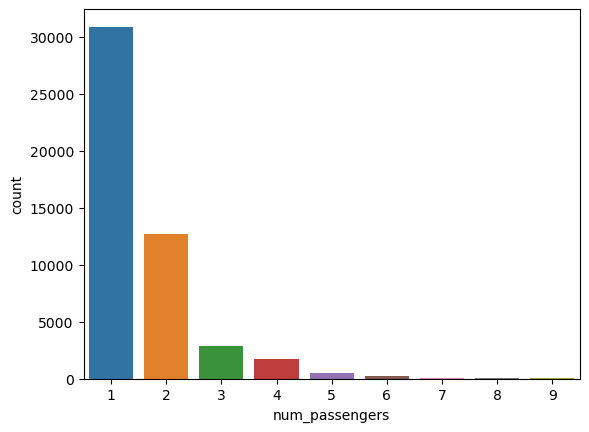

In [68]:
sns.countplot(df['num_passengers'])

<AxesSubplot:xlabel='trip_type', ylabel='count'>

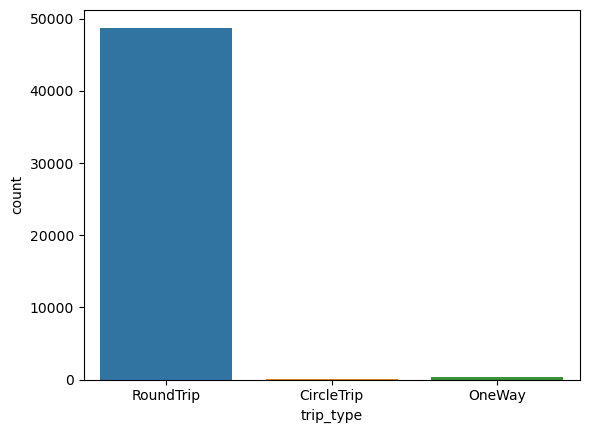

In [69]:
sns.countplot(df['trip_type'])

<AxesSubplot:xlabel='flight_day', ylabel='count'>

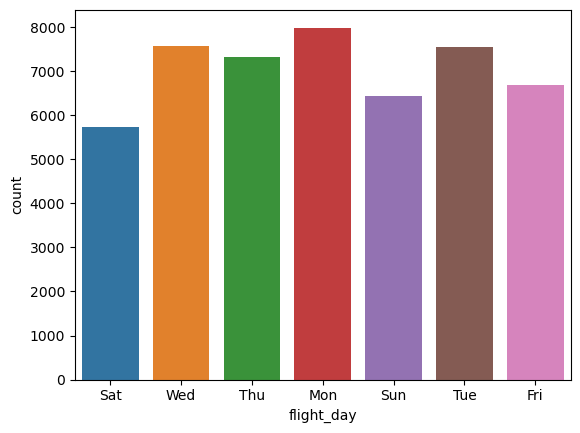

In [70]:
sns.countplot(df['flight_day'])

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='wants_preferred_seat'>

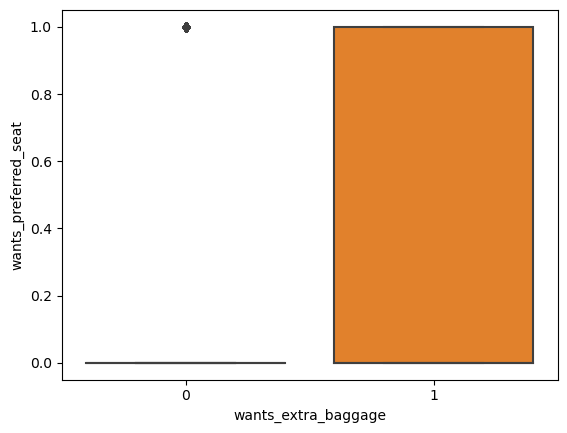

In [71]:
sns.boxplot(data = df, x = 'wants_extra_baggage', y = 'wants_preferred_seat')

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

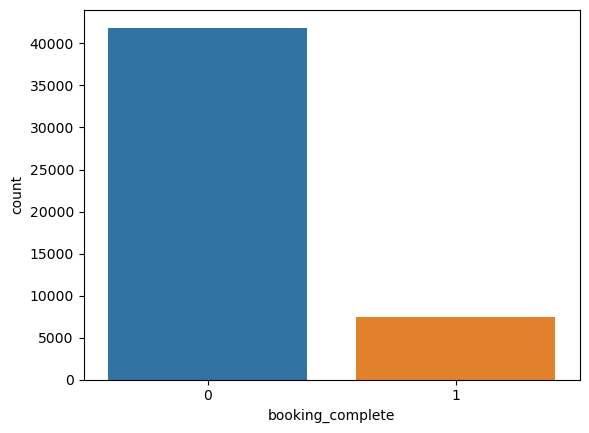

In [72]:
sns.countplot(df['booking_complete'])

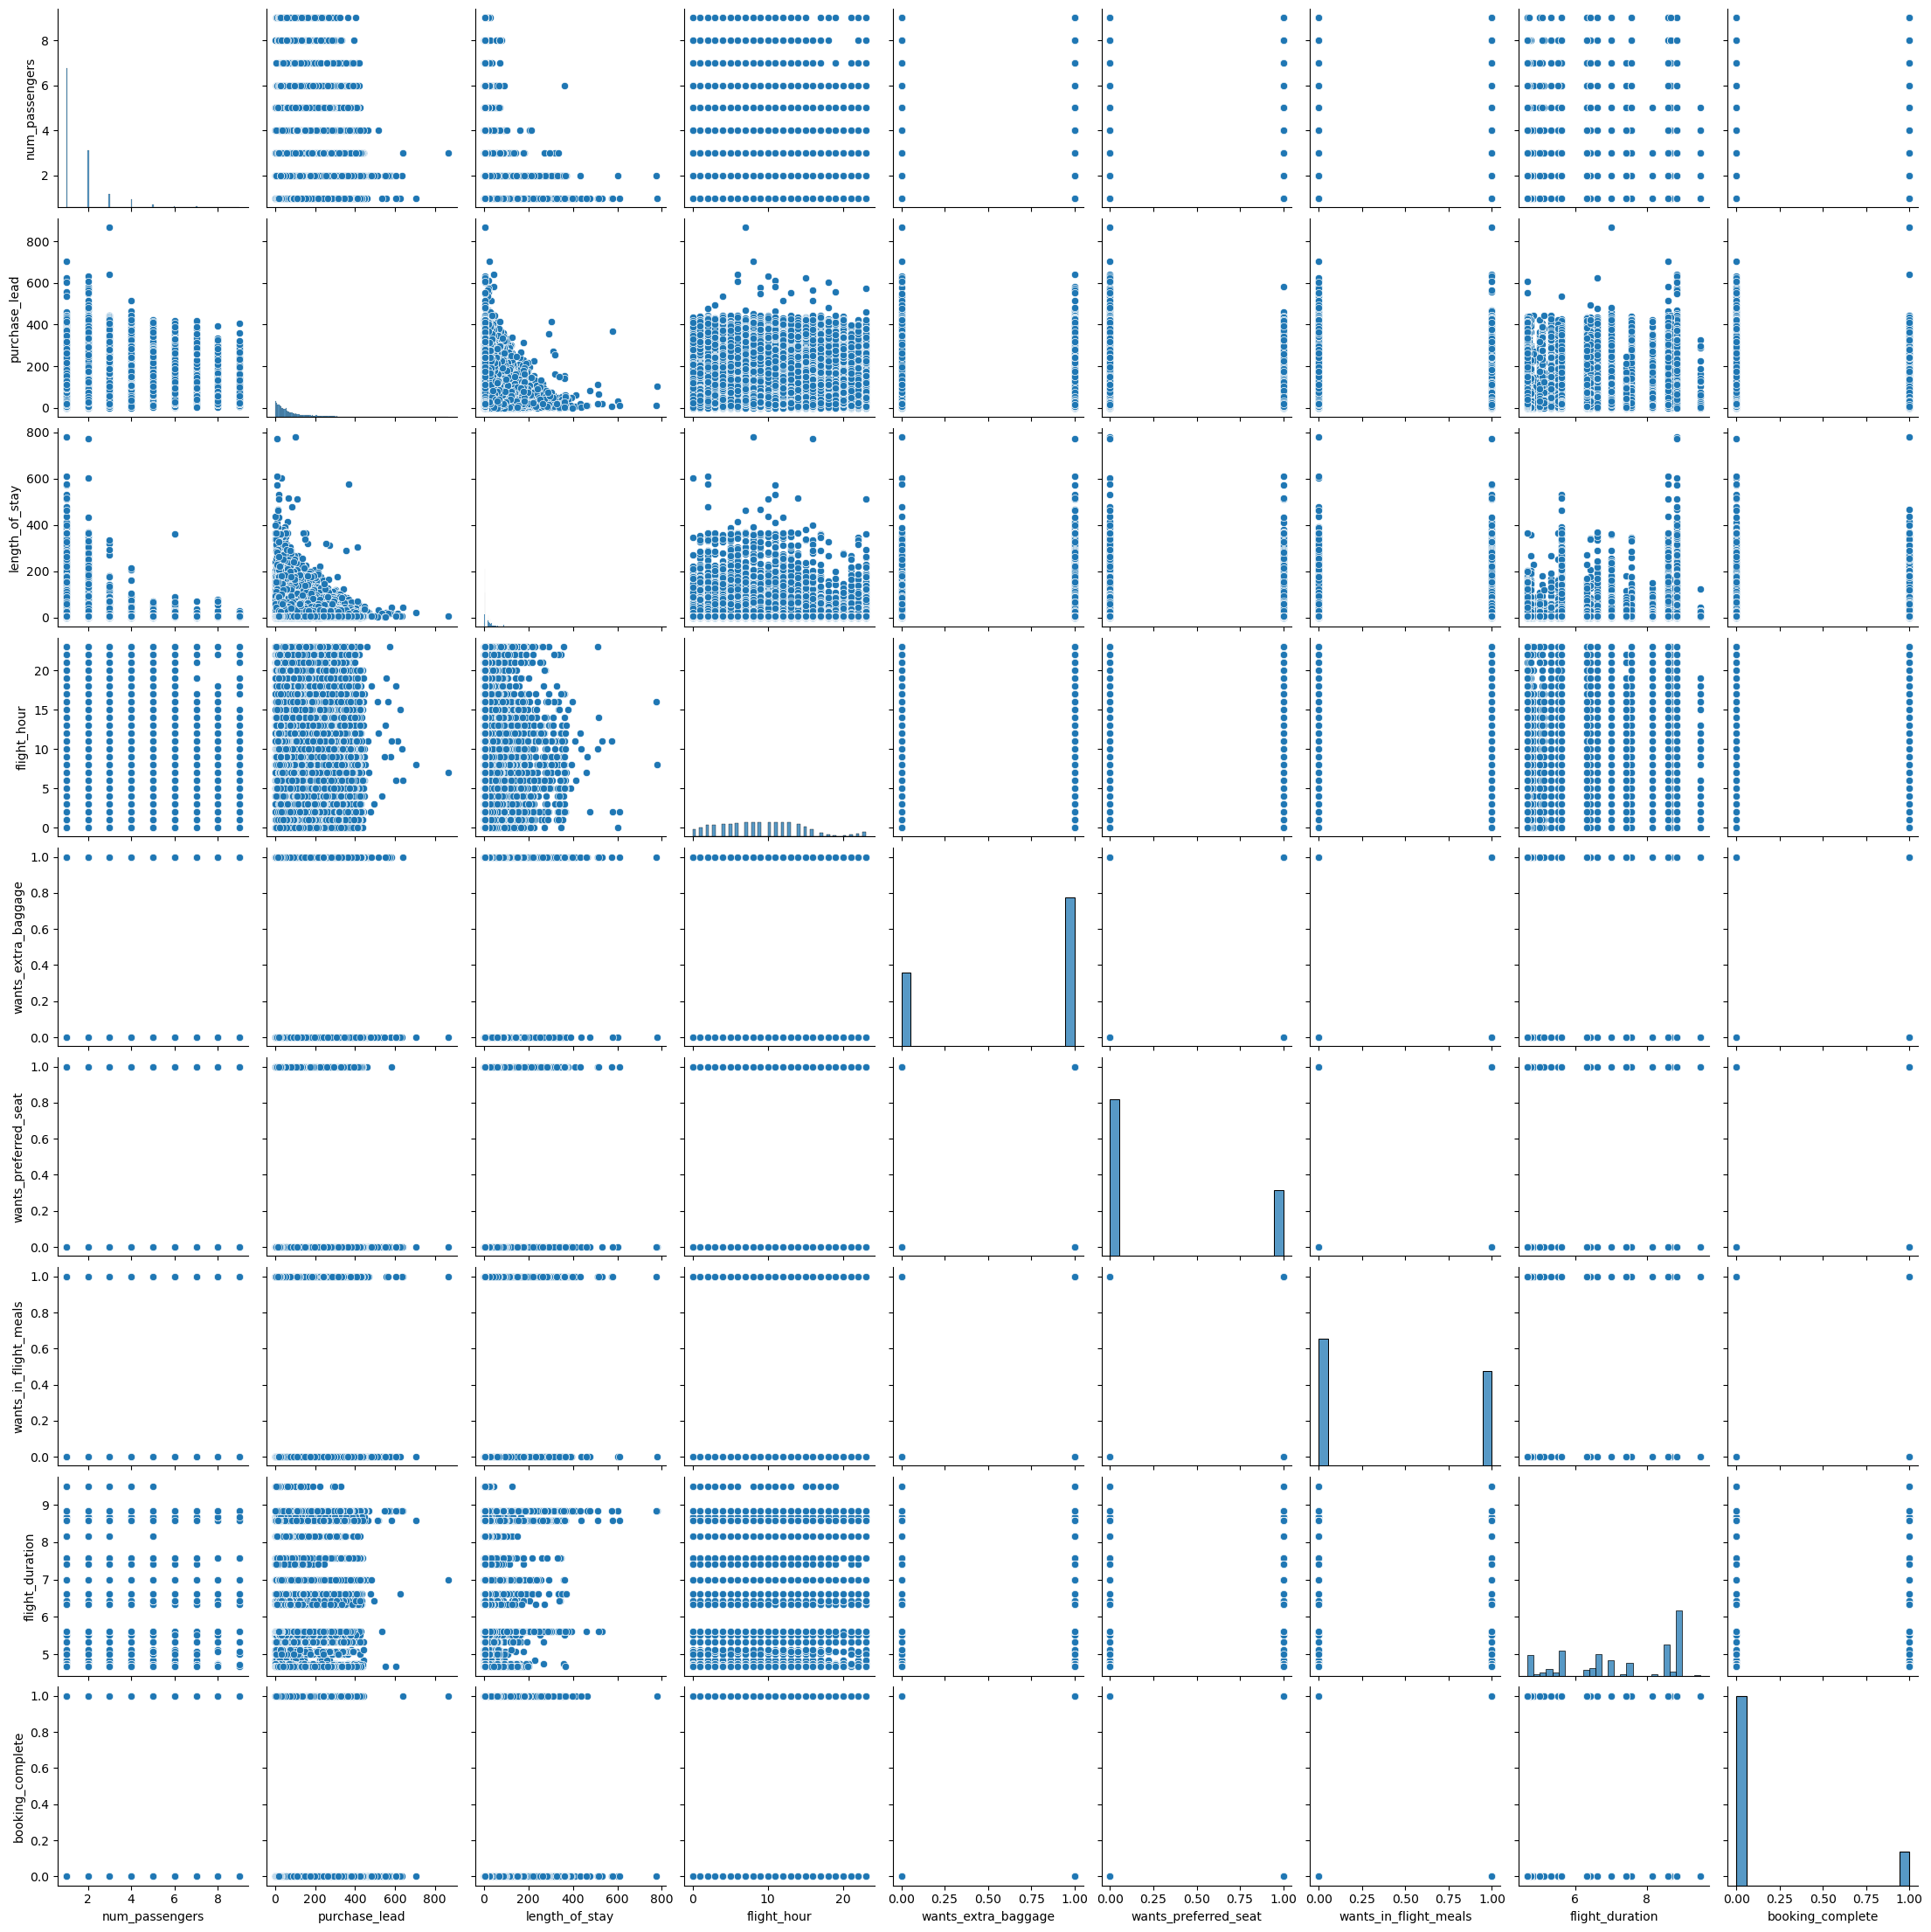

In [73]:
sns.pairplot(df)

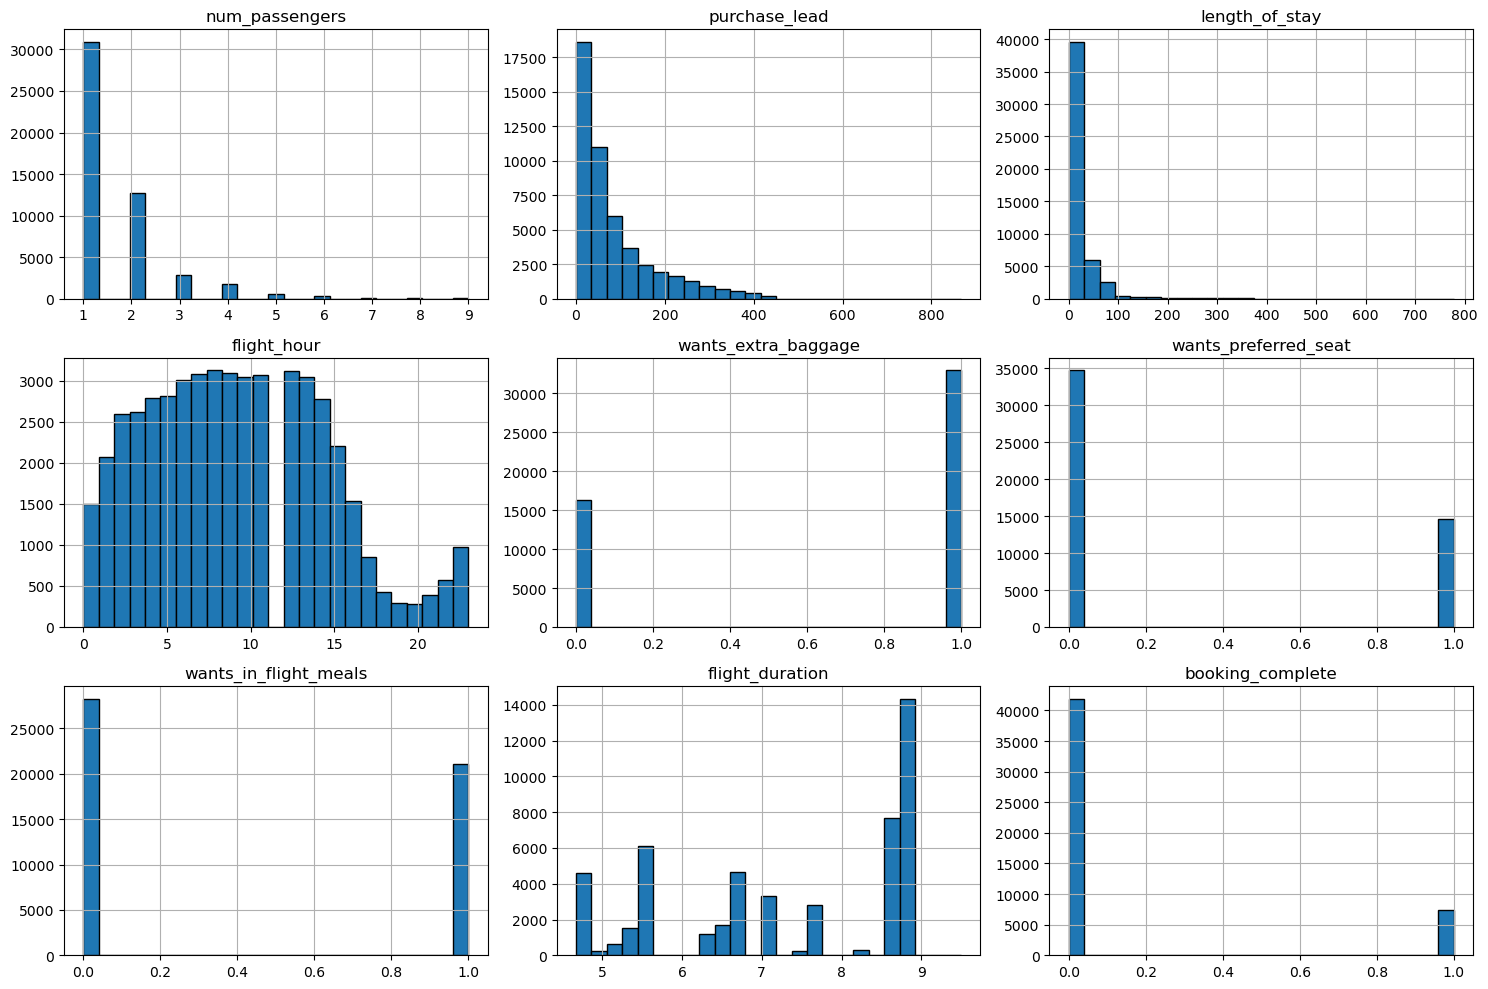

In [74]:
df.hist(bins=25, figsize=(15,10), layout=(-1,3), edgecolor="black")
plt.tight_layout()

### Heatmap

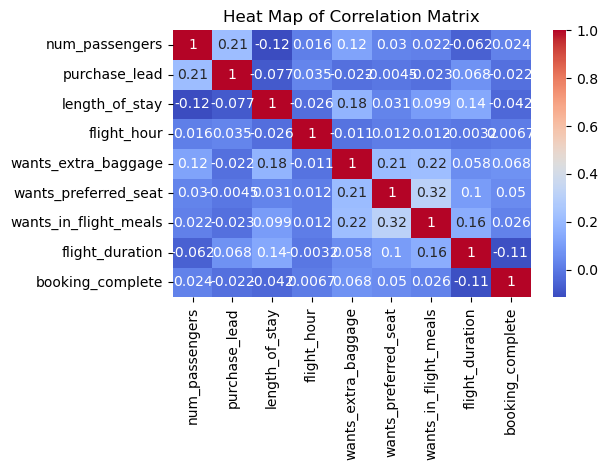

In [75]:
corrmatrix = df.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm", annot = True)
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

Looking at the data we note that we have most of the data in the form of category which needs to be changed to work on. 

Hence we do label encoding for the features to encode the labesl within the features

In [76]:
# Now we import the label encoder function from scikit learn
from sklearn.preprocessing import LabelEncoder

#creating instance of labelencoder
labelencoder=LabelEncoder()

x = df.iloc[:, [1,2,6,7,8]]   # moving columns neede for encoding into x
x.isna().sum()       
y = df.iloc[:, [0,3,4,5,9,10,11,12,13]]     # moving columns which are not needed for encoding into y

In [77]:
# We start creating labels for the categorical features for the ease of working on the data,
# in other words easier for the system or program to understand and interpret

x['sales_channel']=labelencoder.fit_transform(x['sales_channel'])
x['trip_type']=labelencoder.fit_transform(x['trip_type'])
x['flight_day']=labelencoder.fit_transform(x['flight_day'])
x['route']=labelencoder.fit_transform(x['route'])
x['booking_origin']=labelencoder.fit_transform(x['booking_origin'])

In [78]:
y = pd.DataFrame(y)

In [79]:
# concatenate x and y
df_new=pd.concat([x,y],axis=1)
df_new.columns
df_new.isna().sum()
df_new.describe()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49281 entries, 0 to 49280
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sales_channel          49281 non-null  int32  
 1   trip_type              49281 non-null  int32  
 2   flight_day             49281 non-null  int32  
 3   route                  49281 non-null  int32  
 4   booking_origin         49281 non-null  int32  
 5   num_passengers         49281 non-null  int64  
 6   purchase_lead          49281 non-null  int64  
 7   length_of_stay         49281 non-null  int64  
 8   flight_hour            49281 non-null  int64  
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.3 MB

In [80]:
# The dimension of the dataset after label Encoding
df_new.shape

(49281, 14)

### Outliers Analysis:

Exceptional data values in a variable can be outliers. In case of outliers we can use one of the strategies of 3 R (Rectify, Retain, or Remove)

**Box Plot**

Visualize numeric data using boxplot for outliers

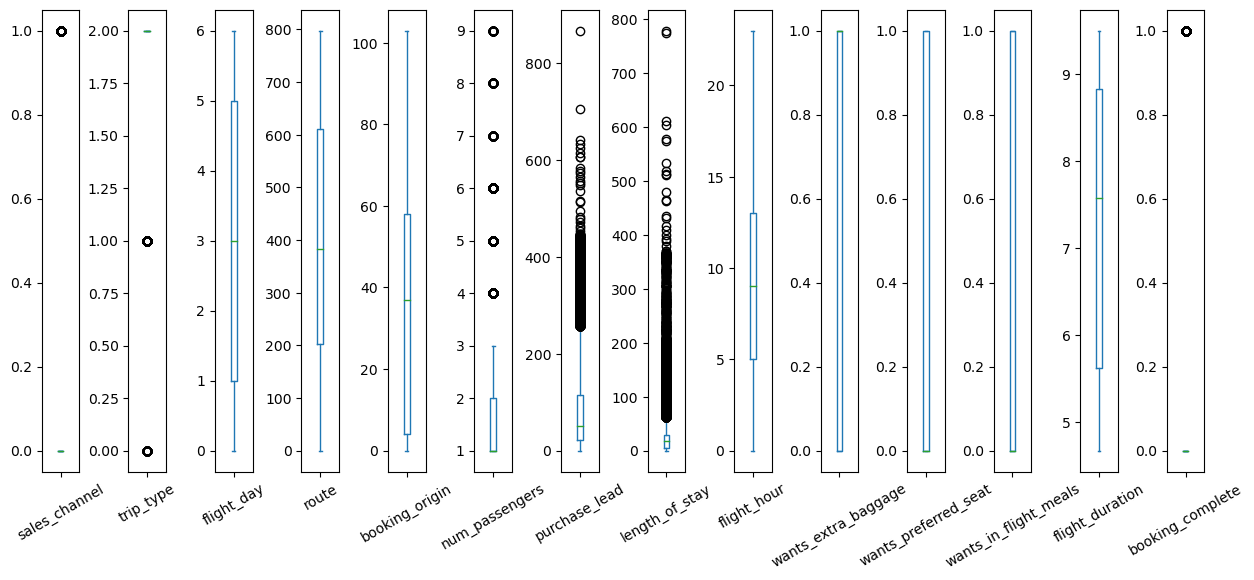

In [81]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

df_new.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 6),rot = 30) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 1.3) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

Boxplots show outliers in: Customer Lifetime Value, Monthly Premium Auto, Number of Open Complaints, 
Number of Policies & Total Claim Amount.

***Outlier Analysis***: 
We shall use Winsorization Technique to treat outliers

In [82]:
# Detection of outliers (find limits for Number of Open Complaints based on IQR)
IQR = df_new['sales_channel'].quantile(0.75) - df_new['sales_channel'].quantile(0.25)

lower_limit = df_new['sales_channel'].quantile(0.25) - (IQR * 1.5)
upper_limit = df_new['sales_channel'].quantile(0.75) + (IQR * 1.5)
# Replace the outliers by the maximum and minimum limit
df_new['sales_channel'] = pd.DataFrame(np.where(df_new['sales_channel'] > upper_limit, upper_limit, np.where(df_new['sales_channel'] < lower_limit, lower_limit, df_new['sales_channel'])))


In [83]:
# Detection of outliers (find limits for Number of Open Complaints based on IQR)
IQR = df_new['trip_type'].quantile(0.75) - df_new['trip_type'].quantile(0.25)

lower_limit = df_new['trip_type'].quantile(0.25) - (IQR * 1.5)
upper_limit = df_new['trip_type'].quantile(0.75) + (IQR * 1.5)
# Replace the outliers by the maximum and minimum limit
df_new['trip_type'] = pd.DataFrame(np.where(df_new['trip_type'] > upper_limit, upper_limit, np.where(df_new['trip_type'] < lower_limit, lower_limit, df_new['trip_type'])))


In [84]:
# Winsorization for "Monthly Premium Auto" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['num_passengers'])

df_new['num_passengers'] = winsor.fit_transform(df_new[['num_passengers']]) # this is replacing the outliers to cap values

In [85]:
# Winsorization for "Monthly Premium Auto" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['purchase_lead'])

df_new['purchase_lead'] = winsor.fit_transform(df_new[['purchase_lead']]) # this is replacing the outliers to cap values

In [86]:
# Winsorization for "Monthly Premium Auto" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['length_of_stay'])

df_new['length_of_stay'] = winsor.fit_transform(df_new[['length_of_stay']]) # this is replacing the outliers to cap values

#### Verify for outliers post the treatment

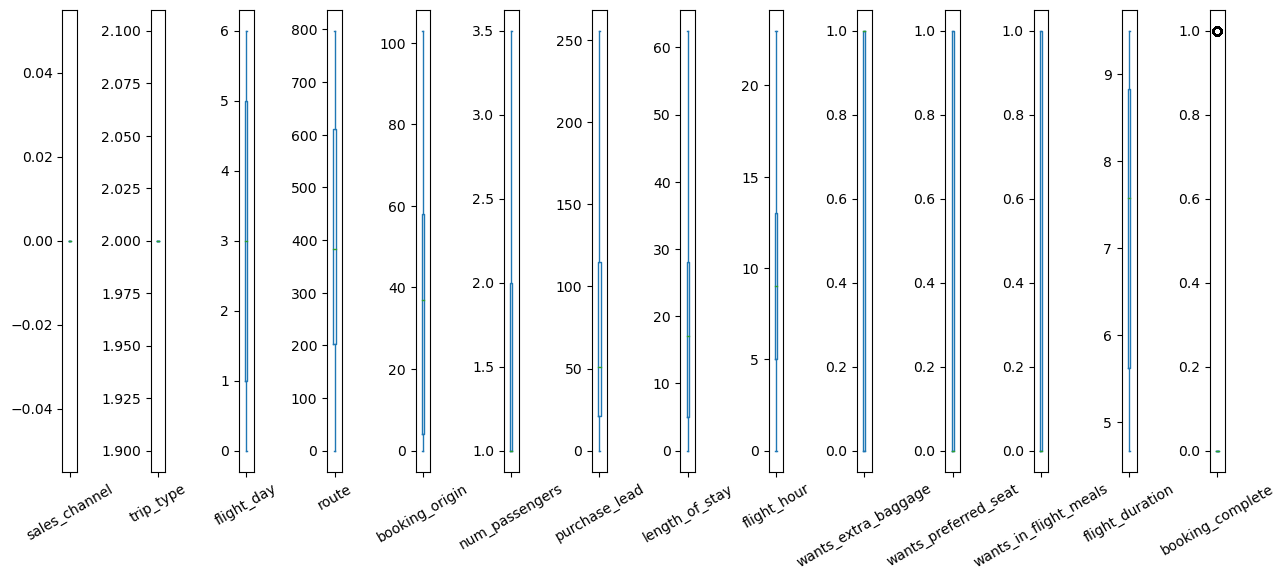

In [87]:
df_new.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 6), rot = 30) # sharey = True shares the Y axis across all plots

# increase spacing between subplots
plt.subplots_adjust(wspace = 5) 
plt.show()

In [88]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49281 entries, 0 to 49280
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sales_channel          49281 non-null  float64
 1   trip_type              49281 non-null  float64
 2   flight_day             49281 non-null  int32  
 3   route                  49281 non-null  int32  
 4   booking_origin         49281 non-null  int32  
 5   num_passengers         49281 non-null  float64
 6   purchase_lead          49281 non-null  float64
 7   length_of_stay         49281 non-null  float64
 8   flight_hour            49281 non-null  int64  
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(6), int32(3), int64(5)
memory usage: 4.7 MB

In [89]:
df_new.head()

,sales_channel,trip_type,flight_day,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.0,2.0,2,0,61,2.0,256.0,19.0,7,1,0,0,5.52,0
1,0.0,2.0,2,0,61,1.0,112.0,20.0,3,0,0,0,5.52,0
2,0.0,2.0,6,0,36,2.0,243.0,22.0,17,1,1,0,5.52,0
3,0.0,2.0,2,0,61,1.0,96.0,31.0,4,0,0,1,5.52,0
4,0.0,2.0,6,0,36,2.0,68.0,22.0,15,1,0,1,5.52,0


# Train-Test Split :

In [90]:
X = df_new.drop('booking_complete', axis = 1)
Y = df_new['booking_complete']

In [91]:
X

,sales_channel,trip_type,flight_day,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.0,2.0,2,0,61,2.0,256.0,19.0,7,1,0,0,5.52
1,0.0,2.0,2,0,61,1.0,112.0,20.0,3,0,0,0,5.52
2,0.0,2.0,6,0,36,2.0,243.0,22.0,17,1,1,0,5.52
3,0.0,2.0,2,0,61,1.0,96.0,31.0,4,0,0,1,5.52
4,0.0,2.0,6,0,36,2.0,68.0,22.0,15,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,0.0,2.0,2,720,4,2.0,27.0,6.0,9,1,0,1,5.62
49277,0.0,2.0,3,720,4,1.0,111.0,6.0,4,0,0,0,5.62
49278,0.0,2.0,2,720,4,1.0,24.0,6.0,22,0,0,1,5.62
49279,0.0,2.0,1,720,4,1.0,15.0,6.0,11,1,0,1,5.62


In [92]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
49276    0
49277    0
49278    0
49279    0
49280    0
Name: booking_complete, Length: 49281, dtype: int64

## Synthetic Minority Oversampling Technique (SMOTE)

In [93]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 44)

In [94]:
X_res, Y_res = sm.fit_resample(X, Y)

In [95]:
Y_res.value_counts()

0    41890
1    41890
Name: booking_complete, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split


X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(X_res,Y_res, test_size =0.20, random_state = 44)

In [97]:
print(X_train_res.shape)
print(X_test_res.shape)

(67024, 13)
(16756, 13)


In [98]:
print(Y_train_res.shape)
print(Y_test_res.shape)

(67024,)
(16756,)


In [107]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(random_state = 42)

In [109]:
clf_rand.fit(X_train_res, Y_train_res)

RandomForestClassifier(random_state=42)

In [111]:
y_pred_rand_train = clf_rand.predict(X_train_res)
y_pred_rand_test = clf_rand.predict(X_test_res)

In [117]:
def modeEval(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('Acuracy score of the Model is :', accuracy)
    print(class_rep)

In [119]:
print('                    Training Report           ')
modelEval(Y_train_res, y_pred_rand_train)

                    Training Report           
The accuracy of the Model is : 0.999835879684889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33644
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     67024
   macro avg       1.00      1.00      1.00     67024
weighted avg       1.00      1.00      1.00     67024



In [120]:
print('               Testing Report                            ')
modelEval(Y_test_res, y_pred_rand_test)

               Testing Report                            
The accuracy of the Model is : 0.9039150155168298
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8246
           1       0.93      0.88      0.90      8510

    accuracy                           0.90     16756
   macro avg       0.90      0.90      0.90     16756
weighted avg       0.91      0.90      0.90     16756

